## Parameterized Quantum Circuit(PQC):

### Data Encoding

### Quantum Circuit

In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from pqc import PQC_Forecast

### Training - Data Preparation

In [2]:
TRAIN_TEST_RATIO = 8 / 10

In [3]:
# Preprocess the data
new_filepath = PQC_Forecast.preprocess_data(
    filepath="../data/paper-data.csv",
    difference=False,
    scale_to_range=True,
    training_data_cutoff=TRAIN_TEST_RATIO,
)
# Load the data
X, y = PQC_Forecast.load_data(filepath=new_filepath)

# Split the data into training and testing sets
train_test_split_index = int(len(X) * TRAIN_TEST_RATIO)
train_X, train_y, test_X, test_y = (
    X[:train_test_split_index],
    y[:train_test_split_index],
    X[train_test_split_index:],
    y[train_test_split_index:],
)

### Training - Model Creation and Training

In [4]:
N_WIRES = 12
N_LAYERS = 2

In [5]:
# Create LBFGS-B model
pqc_model_lbfgsb = PQC_Forecast(
    n_wires=N_WIRES, n_layers=N_LAYERS, optimizer="L-BFGS-B"
)
# Create the COBYLA model
pqc_model_cobyla = PQC_Forecast(
    n_wires=N_WIRES, n_layers=N_LAYERS, optimizer="COBYLA"
)

In [ ]:
# Train the models
pqc_model_lbfgsb.train(train_X, train_y)
pqc_model_cobyla.train(train_X, train_y)

In [ ]:
# save weights
pqc_model_lbfgsb.save_weights("../weights/pqc_weights_lbfgsb.npy")
pqc_model_cobyla.save_weights("../weights/pqc_weights_cobyla.npy")

In [6]:
# load weights
pqc_model_lbfgsb.load_weights("../weights/pqc_weights_lbfgsb.npy")
pqc_model_cobyla.load_weights("../weights/pqc_weights_cobyla.npy")

True

(<Figure size 1100x1300 with 1 Axes>, <Axes: >)

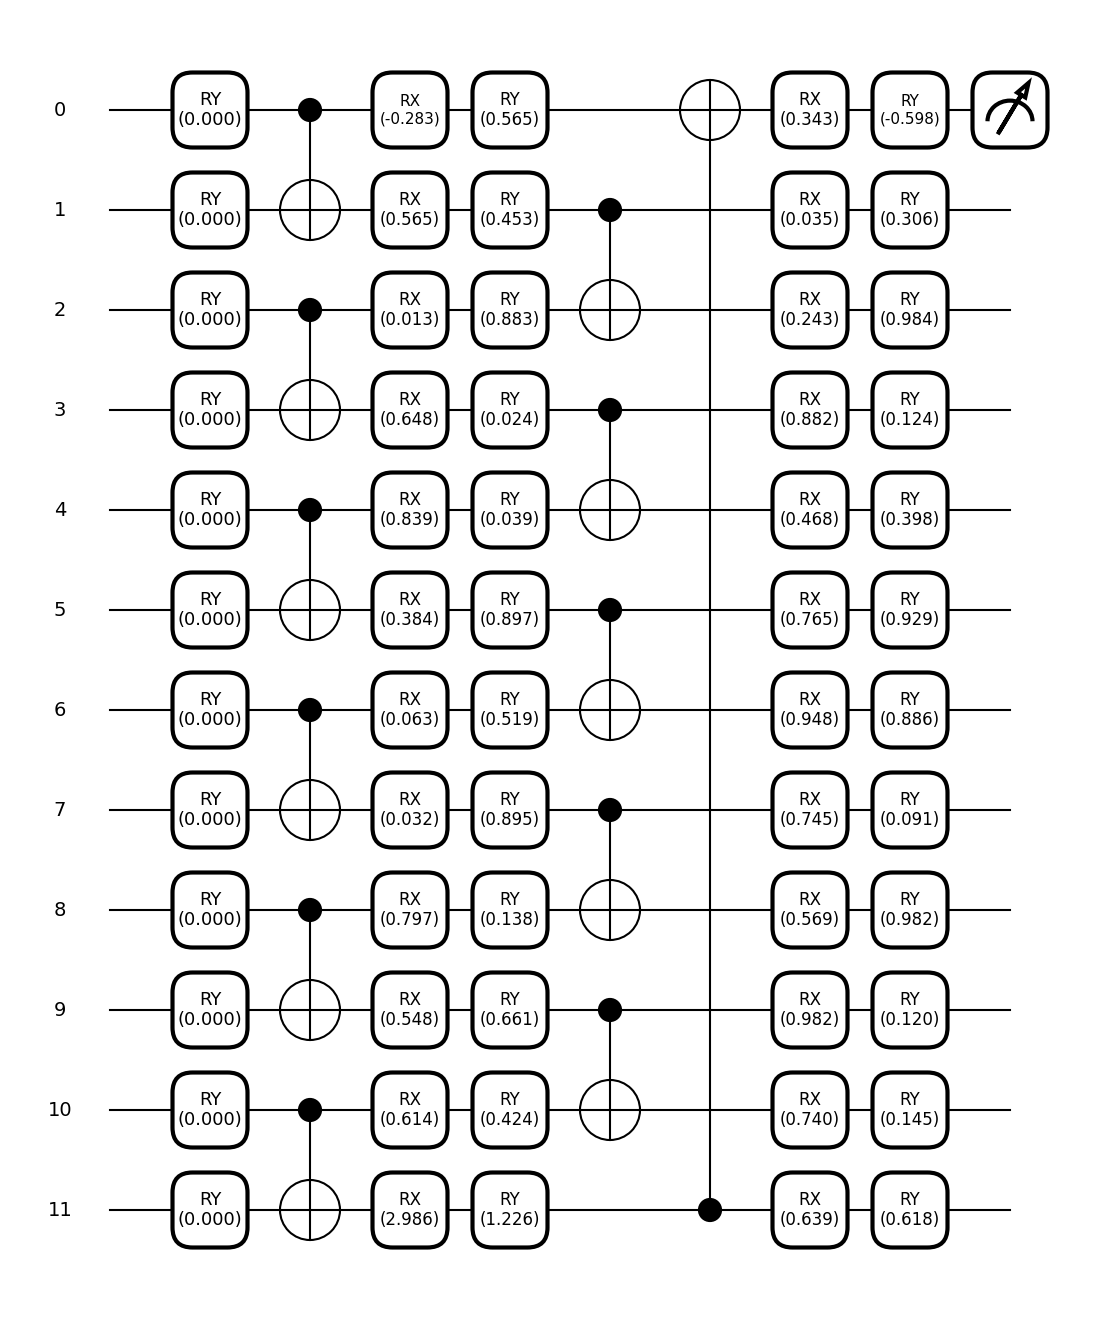

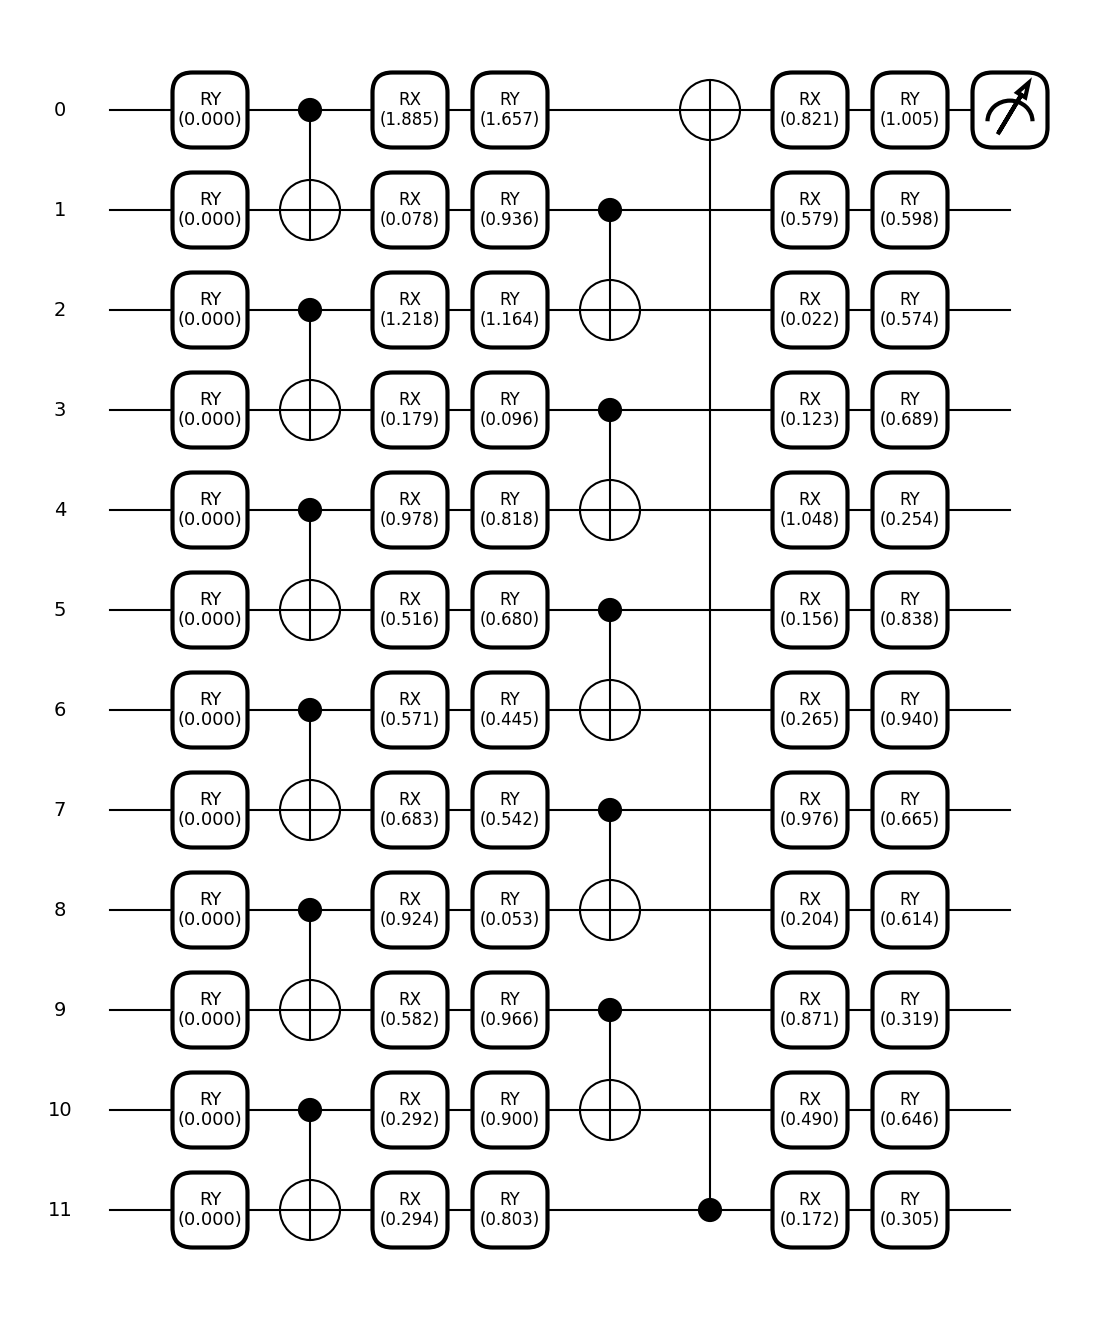

In [7]:
# Draw circuits
pqc_model_lbfgsb.draw_circuit()
pqc_model_cobyla.draw_circuit()

### Prediction + Analysis

In [8]:
# Predict the dataset as whole
predictions_L = pqc_model_lbfgsb.predict(X)
predictions_C = pqc_model_cobyla.predict(X)

In [9]:
# Computer Training MSE
mse_L = np.mean((predictions_L[:train_test_split_index] - train_y) ** 2)
mse_C = np.mean((predictions_C[:train_test_split_index] - train_y) ** 2)
print(f"Training MSE L-BFGS-B: {mse_L}")
print(f"Training MSE COBYLA: {mse_C}")
# Compute Testing MSE
mse_L = np.mean((predictions_L[train_test_split_index:] - test_y) ** 2)
mse_C = np.mean((predictions_C[train_test_split_index:] - test_y) ** 2)
print(f"Testing MSE L-BFGS-B: {mse_L}")
print(f"Testing MSE COBYLA: {mse_C}")

Training MSE L-BFGS-B: 0.004288779343470974
Training MSE COBYLA: 0.011071391818033858
Testing MSE L-BFGS-B: 0.01196807412443626
Testing MSE COBYLA: 0.012661485974404486


Text(0.5, 1.0, 'PQC Time-Series Forecasting')

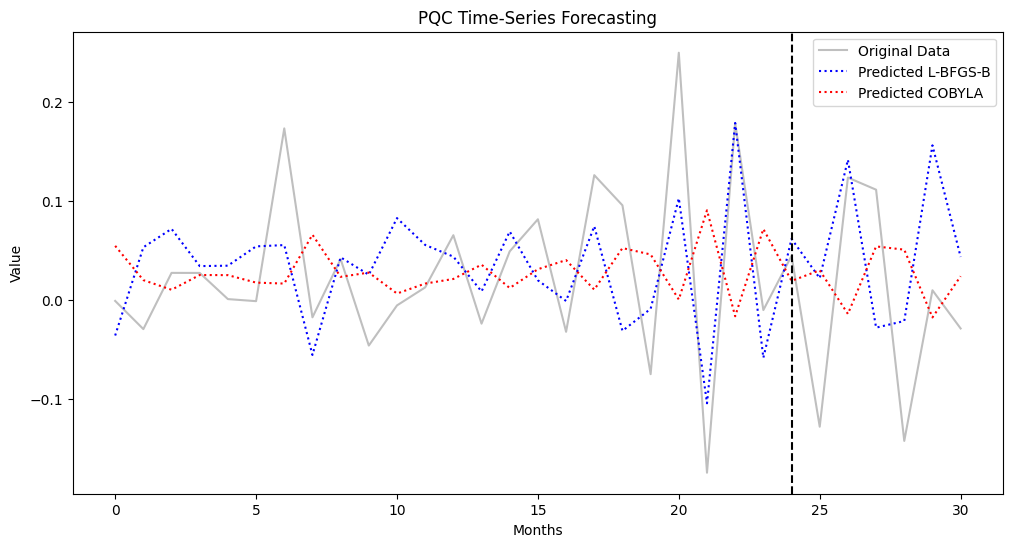

In [10]:
# Plot the predictions
plt.figure(figsize=(12, 6))
# plot the original data as grey line
plt.plot(range(len(y)), y, label="Original Data", color="grey", alpha=0.5)
# plot the predicted data as dotted blue line
plt.plot(
    range(len(predictions_L)),
    predictions_L,
    label="Predicted L-BFGS-B",
    color="blue",
    linestyle="dotted",
)
plt.plot(
    range(len(predictions_C)),
    predictions_C,
    label="Predicted COBYLA",
    color="red",
    linestyle="dotted",
)

# label the x and y axis
plt.xlabel("Months")
plt.ylabel("Value")
# enable legend
plt.legend()

# mark the split between training and testing data
plt.axvline(x=train_test_split_index, color="black", linestyle="--")
plt.title("PQC Time-Series Forecasting")